<a href="https://colab.research.google.com/github/94jjiisu/Data-analysis/blob/master/game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings(action='ignore')

Mounted at /content/drive


# 1. 분석을 진행하는데 문제가 없는 깨끗한 데이터인지 마지막으로 확인

In [ ]:
filename = '/content/drive/MyDrive/DS_camp/game.csv'
df = pd.read_csv(filename)
df = df.drop(columns=['Unnamed: 0'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


In [ ]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04


##1-1. 전체적인 판매 규모를 파악하기 위해 4개의 Sales Feature를 더한 Total_Sales Feature를 생성.

In [ ]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [ ]:
#df.describe()

## 전체 게임의 평균 판매량은 약 54만장이며, 개별 게임의 시장별 판매량 평균은 북미, 유럽, 일본, 그 외 지역 순이다.

##1-2. 데이터 내 전체 플랫폼의 종류는 총 31가지이다.

In [ ]:
platform = df['Platform'].unique()
#print(len(platform))
#print(platform)

##1-3. 데이터가 포함하는 연도는 1980년부터 2020년까지이며, 2018, 2019년도는 누락되어있다.

결측값 처리 과정에서 삭제되었거나, 원본 데이터가 없을 가능성이 있다.

In [ ]:
year = df['Year'].unique()
#print(len(year))
#print(np.sort(year))

##1-4. 게임의 장르는 총 12가지이다.

In [ ]:
genre = df['Genre'].unique()
#print(len(genre))
#print(genre)

##1-5. 게임의 배급사는 총 575개이다. 

In [ ]:
platform = df['Publisher'].unique()
#print(len(platform))

##1-5-1. 가장 많은 게임을 유통한 배급사는 EA, 액티비전, 반다이 남코, 유비소프트 순이다.

In [ ]:
top20_publ = df['Publisher'].value_counts()
#top20_publ[:40]

##1-6. 게임 장르별 총 판매량은 액션, 스포츠, 슈팅, 롤 플레잉 순이다.

In [ ]:
genre_NA = df.groupby(by=['Genre'])['NA_Sales'].sum()
genre_EU = df.groupby(by=['Genre'])['EU_Sales'].sum() 
genre_JP = df.groupby(by=['Genre'])['JP_Sales'].sum()
genre_OTHER = df.groupby(by=['Genre'])['Other_Sales'].sum() 
genre_TOTAL = df.groupby(by=['Genre'])['Total_Sales'].sum() 

In [ ]:
genre_NA = genre_NA.reset_index()
genre_EU = genre_EU.reset_index()
genre_JP = genre_JP.reset_index()
genre_OTHER = genre_OTHER.reset_index()
genre_TOTAL = genre_TOTAL.reset_index()

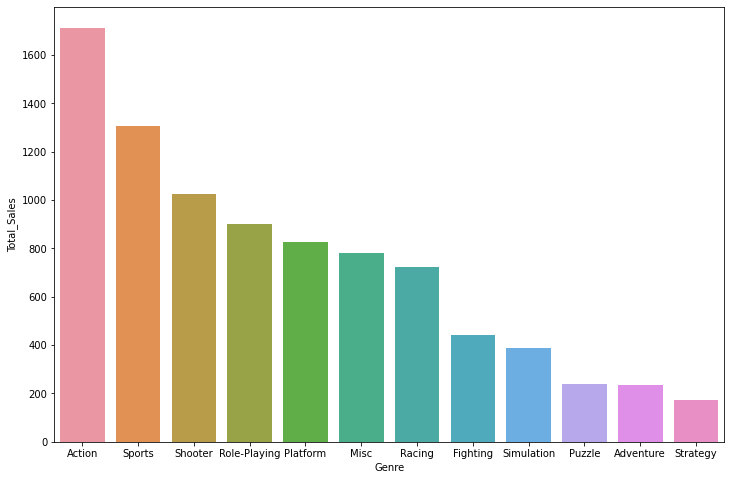

In [ ]:
genre_TOTAL = genre_TOTAL.sort_values(by='Total_Sales', axis=0, ascending=False)
genre_TOTAL.reset_index(drop=True)
plt.figure(figsize=(12,8))
sns.barplot(data = genre_TOTAL, x = 'Genre', y = 'Total_Sales');

In [ ]:
df_genre = genre_NA.merge(genre_EU, how = 'inner', on = 'Genre')
df_genre = df_genre.merge(genre_JP, how = 'inner', on = 'Genre')
df_genre = df_genre.merge(genre_OTHER, how = 'inner', on = 'Genre')
df_genre = df_genre.merge(genre_TOTAL, how = 'inner', on = 'Genre')

#2. 지역과 장르에 따른 판매량 표는 다음과 같다.

In [ ]:
#df_genre = df_genre.set_index("Genre")
#df_genre

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

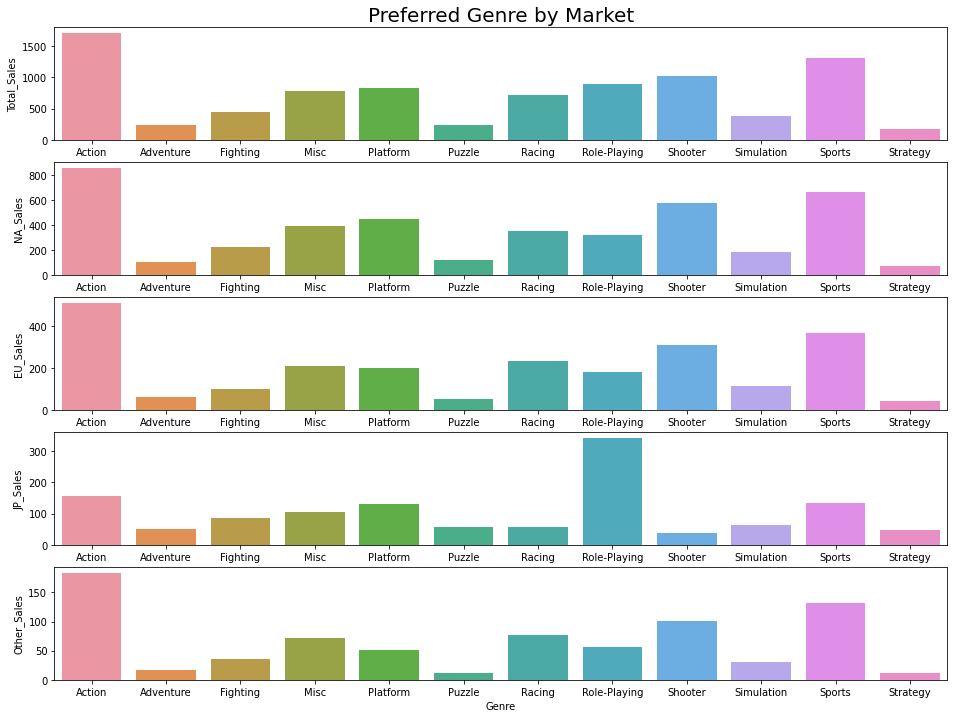

In [ ]:
fig, axes = plt.subplots(5, 1, figsize= (16,12))
sns.barplot(data = df_genre, x = 'Genre', y = 'Total_Sales', ax = axes[0])
sns.barplot(data = df_genre, x = 'Genre', y = 'NA_Sales', ax = axes[1])
sns.barplot(data = df_genre, x = 'Genre', y = 'EU_Sales', ax = axes[2])
sns.barplot(data = df_genre, x = 'Genre', y = 'JP_Sales', ax = axes[3])
sns.barplot(data = df_genre, x = 'Genre', y = 'Other_Sales', ax = axes[4])
axes[0].set_title('Preferred Genre by Market', fontsize=20);

##2-1. 막대그래프로 확인해본 결과 전체적으로는 액션과 스포츠 게임의 선호가 뚜렸했다. 

##북미, 유럽, 그 외 지역은 액션 장르가 제일 판매량이 높은 반면에 일본에서는 롤 플레잉 장르의 판매량이 가장 높다.

##2-2. 지역에 따라 선호하는 장르가 다름을 통계적으로 확인하기 위해 카이제곱 검정을 실시한다.

카이제곱 검정이란, 주어진 데이터가 특정 예상되는 분포와 동일한 분포를 나타내는지 에 대한 가설검정 방법으로 해당 문제에 대한 가설은 다음과 같다.

##H0 : 지역에 따라 장르별 판매량 분포가 유사하다.
##H1 : 지역에 따라 장르별 판매량 분포가 유사하지 않다.

신뢰구간 95%를 기준으로 p-value 의 값이 0.05보다 높으면 분포가 유사하다고 할 수 있다.

In [ ]:
import scipy.stats as stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [ ]:
na_sales = df['NA_Sales'].sum()
eu_sales = df['EU_Sales'].sum()
jp_sales = df['JP_Sales'].sum()
ot_sales = df['Other_Sales'].sum()

In [ ]:
df_genre['NA_pct'] = df_genre['NA_Sales'] / na_sales * 100
df_genre['EU_pct'] = df_genre['EU_Sales'] / eu_sales * 100
df_genre['JP_pct'] = df_genre['JP_Sales'] / jp_sales * 100
df_genre['Other_pct'] = df_genre['Other_Sales'] / ot_sales * 100

## 장르의 선호도는 특정 지역에서 해당 장르가 차지하는 판매량의 비율로 측정하여 검정을 실시하였다.

In [ ]:
#df_genre

In [ ]:
df_genre_chi = df_genre[['Genre', 'NA_pct', 'EU_pct', 'JP_pct', 'Other_pct']]
#df_genre_chi

In [ ]:
df_genre_chi = df_genre_chi.set_index('Genre', drop=True)
df_genre_chi = df_genre_chi.transpose()

In [ ]:
#df_genre_chi

##2-3. 4개의 모든 지역에 대해 검정을 실시한 결과
##p-value의 값이 0.087로 0.05보다 크므로 지역간 장르별 판매량의 분포는 유사하다고 할 수 있다.

In [ ]:
chi2_contingency(df_genre_chi)[1]

0.0872309851373666

##4개의 지역에서 시각적으로 선호가 다름을 확인한 일본을 빼고 검정을 실시했을 때,
##p-value의 값이 0.05보다 크므로 일본을 제외한 세 지역은 선호 장르의 분포가 유사하다고 볼 수 있다.

In [ ]:
df_genre_chi2 = df_genre_chi.drop(['JP_pct'])
chi2_contingency(df_genre_chi2)[1]

0.9999999860146723

##하지만 일본과 다른 하나의 지역을 묶어 검정을 진행하면 
##모두 선호 장르의 분포가 통계적으로 다름을 확인할 수 있다.

In [ ]:
df_genre_chi3 = df_genre_chi.drop(['EU_pct', 'Other_pct'])
chi2_contingency(df_genre_chi3)[1]

0.014110253574323587

In [ ]:
df_genre_chi4 = df_genre_chi.drop(['NA_pct', 'Other_pct'])
chi2_contingency(df_genre_chi4)[1]

0.008804164914480855

In [ ]:
df_genre_chi5 = df_genre_chi.drop(['NA_pct', 'EU_pct'])
chi2_contingency(df_genre_chi5)[1]

0.002231298848699732

##2-4. 결론: 일본을 제외한 북미, 유럽, 그 외 지역은 선호 장르가 통계적으로 유사하나, 일본은 유사하지 않다. 

------------------

#3. 연도별 게임의 트렌드가 있을까 를 확인하기 위해 각 연도에서 판매량이 가장 높은 게임의 장르를 추출한다.

In [ ]:
yearly = df.groupby(by=['Year', 'Genre', 'Platform'])['Total_Sales'].sum().reset_index()
#yearly

In [ ]:
top = yearly.groupby(by=['Year'])['Total_Sales'].transform(max) == yearly['Total_Sales']
yearly_trend = yearly[top].reset_index(drop=True)
#yearly_trend

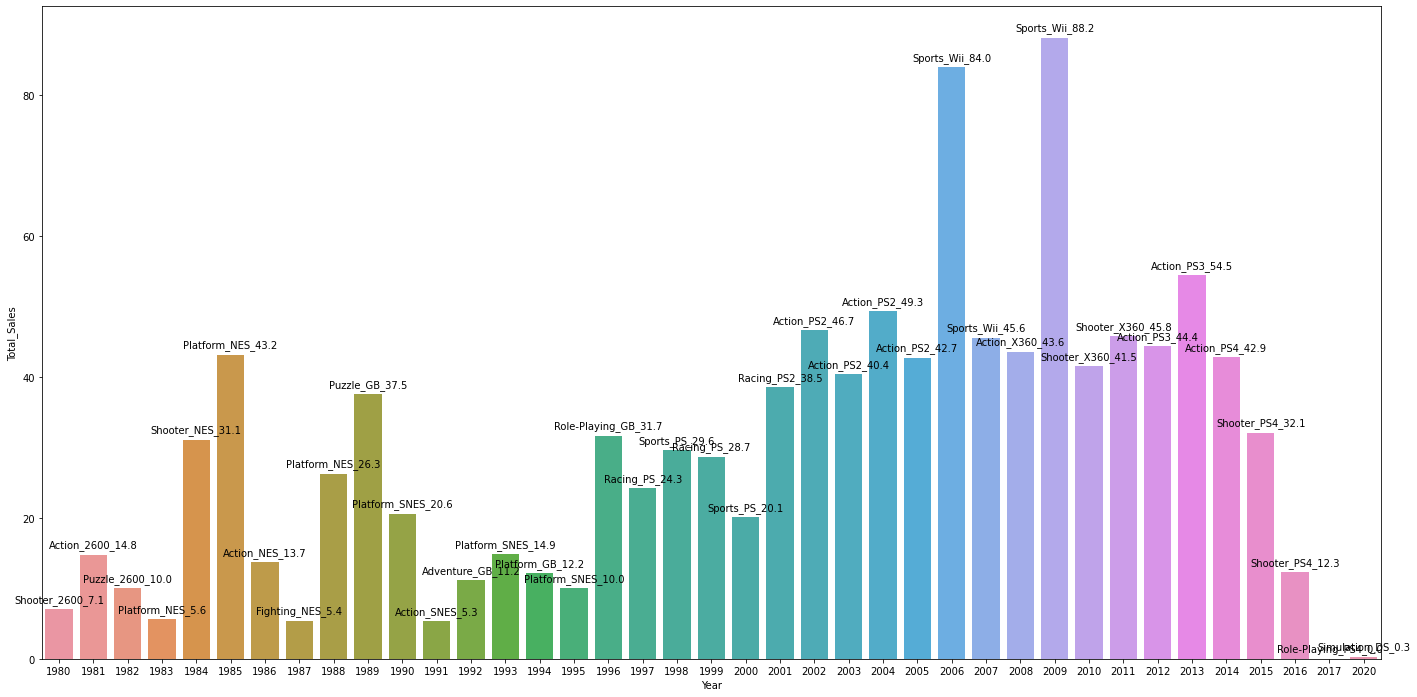

In [ ]:
plt.figure(figsize=(24, 12))

g = sns.barplot(data = yearly_trend, x = 'Year', y = 'Total_Sales')

genre = yearly_trend['Genre']
platform = yearly_trend['Platform']
index = 0
for v in yearly_trend['Total_Sales']:
  g.text(index, v + 1, str(genre[index]+'_' + platform[index] + '_' +str(round(v, 1))), color='black', size=10, ha="center")
  index += 1

plt.show()


##3-1. 2000년 이전에는 비교적 유행하는 게임의 장르가 다양했고, 이용 플랫폼은 대부분 닌텐도임을 확인할 수 있다.

##90년대 말부터 소니의 플레이스테이션이 출시되고부터 2006년 닌텐도의 Wii 게임이 출시되기 전까지 소니의 플레이스테이션 시리즈가 가장 많이 사용되는 플랫폼이 되었다.

##2006년과 2009년에 닌텐도의 Wii Sports 시리즈가 출시됨에따라 기존 판매량의 두배에 가까운 성과를 낸 것으로 보아 닌텐도 Wii는 전 세계적인 트렌드가 되었을 것이다.

##2000년대에 들어와서는 2006, 2009년을 제외하고는 슈팅과 액션 장르의 유행이 이전보다 강해졌으며 데이터가 부족한 최근의 자료를 제외하면 꾸준히 인기있는 장르임을 확인할 수 있다.

-----------------

##3-2. 다음은 게임의 총 판매량을 시각화한 그래프인데 장르의 유행과 총 게임 판매량 규모는 비슷한 양상을 보임을 확인할 수 있다.

In [ ]:
yearly_sales = df.groupby(by=['Year'])['Total_Sales'].sum().reset_index()
#plt.figure(figsize=(20, 10))
#sns.barplot(data = yearly_sales, x = 'Year', y = 'Total_Sales');

-------------------

#4. 출고량이 높은 게임에 대한 분석과 시각화

##4-1. 전체 데이터에 대해 총 판매량 순으로 순위를 매기면 다음과 같다.

##전체 장르별 총 판매량은 액션 장르가 제일 높은 반면에, 개별 게임의 판매량 순위는 1위부터 15위까지 액션 장르가 없는 닌텐도가 전부 차지했다.

## 2006년 닌텐도의 Wii Sports는 판매량이 2위보다 2배 이상 차이난다.

In [ ]:
top_g = df.sort_values(by=['Total_Sales'], ascending=False)
top_20 = top_g[:20]
top_20 = top_20[['Name'	,'Platform',	'Year',	'Genre',	'Publisher','Total_Sales']]
top_20 = top_20.reset_index(drop=True)
#top_20

In [ ]:
df[df['Name'] == 'Wii Sports']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2855,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [ ]:
Wii_S = df[df['Name'] == 'Wii Sports'].drop(['Name',	'Platform',	'Year',	'Genre',	'Publisher'], axis = 1)
Wii_S

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2855,41.49,29.02,3.77,8.46,82.74


##4-2. 전 세계적으로 8200만장 이상이 팔렸고, 그 중 약 절반은 북미 지역에서 판매되었다.

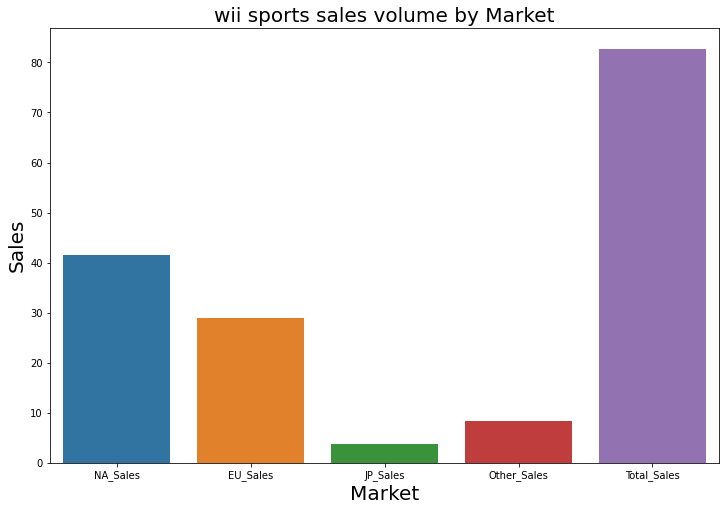

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('wii sports sales volume by Market', fontsize=20)
plt.xlabel('Market', fontsize=20)
plt.ylabel("Sales", fontsize=20)

sns.barplot(data=Wii_S);

In [ ]:
year_2006 = df[df['Year'] == 2006]
total_2006 = year_2006['Total_Sales'].sum()
na_2006 = year_2006['NA_Sales'].sum()
eu_2006 = year_2006['EU_Sales'].sum()
jp_2006 = year_2006['JP_Sales'].sum()
ot_2006 = year_2006['Other_Sales'].sum()

ws_total = Wii_S['Total_Sales']
ws_na = Wii_S['NA_Sales']
ws_eu = Wii_S['EU_Sales']
ws_jp = Wii_S['JP_Sales']
ws_ot = Wii_S['Other_Sales']

r = round((ws_total / total_2006)*100, 2)
r2 = round((ws_na / na_2006)*100, 2)
r3 = round((ws_eu / eu_2006)*100, 2)
r4 = round((ws_jp / jp_2006)*100, 2)
r5 = round((ws_ot / ot_2006)*100, 2)
ratio = [r, 100-r]
ratio2 = [r2, 100-r2]
ratio3 = [r3, 100-r3]
ratio4 = [r4, 100-r4]
ratio5 = [r5, 100-r5]
labels = ['Wii_Sports', 'Others']

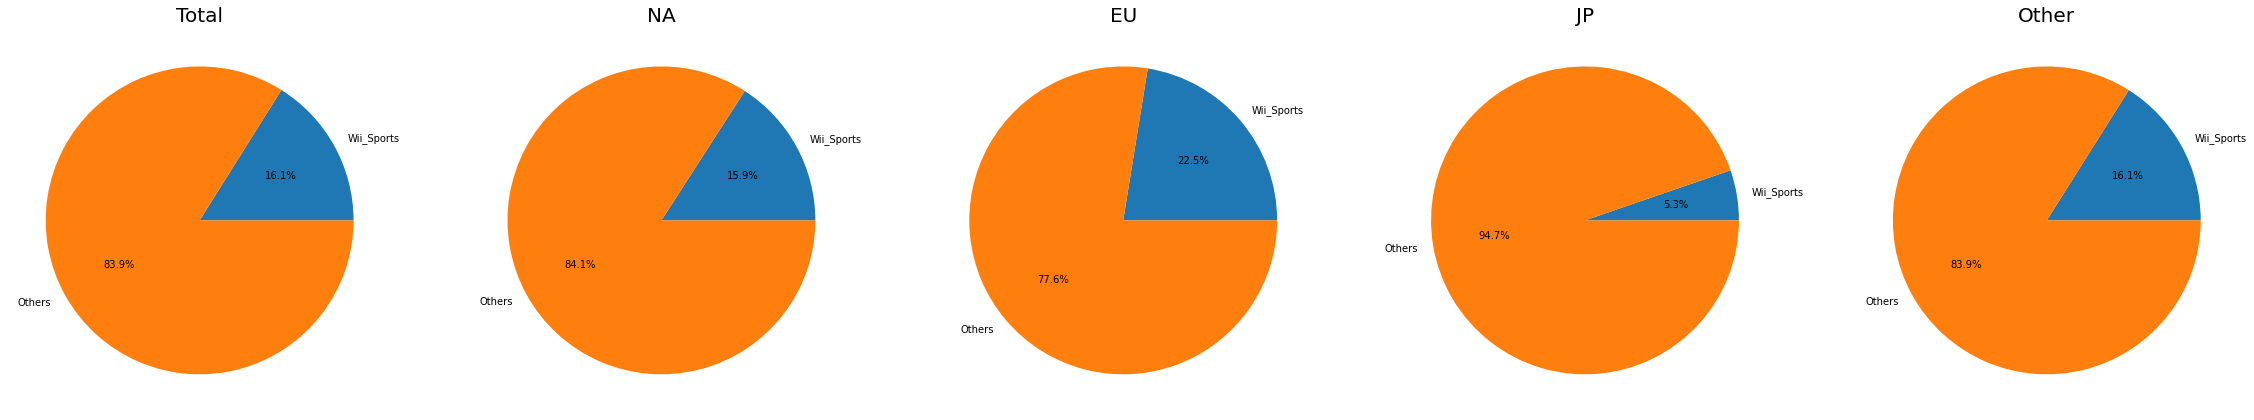

In [ ]:
fig = plt.figure(figsize=(40, 20))
ax1 = fig.add_subplot(1,5,1)
ax2 = fig.add_subplot(1,5,2)
ax3 = fig.add_subplot(1,5,3)
ax4 = fig.add_subplot(1,5,4)
ax5 = fig.add_subplot(1,5,5)
ax1.pie(ratio, labels=labels,autopct='%.1f%%')
ax1.set_title('Total', fontsize=20)
ax2.pie(ratio2, labels=labels,autopct='%.1f%%')
ax2.set_title('NA', fontsize=20)
ax3.pie(ratio3, labels=labels,autopct='%.1f%%')
ax3.set_title('EU', fontsize=20)
ax4.pie(ratio4, labels=labels,autopct='%.1f%%')
ax4.set_title('JP', fontsize=20)
ax5.pie(ratio5, labels=labels,autopct='%.1f%%')
ax5.set_title('Other', fontsize=20)
plt.show()

##4-3. 지역별 2006년도 전체 게임 판매량 중에서 Wii Sports 하나의 품목이 차지하는 비율을 시각화하였다. 
##총 판매량은 북미 지역이 제일 높았으나 2006년 각 지역에서 팔린 비율을 보았을 때 유럽에서 가장 많은 인기를 끌었음을 확인할 수 있다.

##4-4. Wii 플랫폼에서 플레이 가능한 Wii 시리즈 게임은 매우 다양하다.

##다음은 Wii가 포함된 게임의 판매량을 순위대로 나타낸 것이다.

##Wii 시리즈가 꾸준히 판매 실적을 올렸음을 확인할 수 있다.

In [ ]:
df_wii = df[df['Name'].str.contains('Wii')]
df_wii = df_wii.sort_values(by='Total_Sales', axis=0, ascending=False)
df_wii_top = df_wii[:8]
#df_wii_top

In [ ]:
#plt.figure(figsize=(12, 8))
#sns.barplot(data = df_wii_top, x = 'Name', y = 'Total_Sales');

------------------

#5. 그 외 출고량이 높은 게임 분석 and 추가 분석 프로세스

##5-1. 분명 액션 게임이 장르별 판매량에서는 높게 나왔는데 개별 판매량에서는 순위가 낮았다. 그 이유를 알아본다.

##액션 장르만 따로 총 판매량 순으로 상위 10개 게임을 나열해보았다.
##Grand Theft Auto, 즉 GTA 시리즈가 대부분을 차지하고 있음을 확인할 수 있다.
##다수의 게임에서 같은 이름의 게임이지만 판매량 집계가 따로 된 것을 확인할 수 있다.
##그 원인은 게임의 제목은 같으나 출시 플랫폼이 달라 발생한 현상이다.

In [ ]:
action = df[df['Genre'] == 'Action']
top_action = action.sort_values(by='Total_Sales', axis=0, ascending=False)
top_action[:10]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
3414,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
14355,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
10695,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
5226,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
9597,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
1973,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
4704,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
13626,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.03
16120,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.58
8857,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.25


##5-2. 게임 이름에 Grand Theft Auto가 포함된 GTA 시리즈는 총 27개나 있는 것으로 확인되었다.

##이들이 플랫폼별로 판매량이 따로 집계되어 그 총 합이 낮게 나왔음을 추측할 수 있다.

In [ ]:
df_gta = df[df['Name'].str.contains('Grand Theft Auto')]
#df_gta.info()

In [ ]:
top_gta = df_gta.sort_values(by='Total_Sales', axis=0, ascending=False)
#top_gta.head()

In [ ]:
#df_gta['Name'].value_counts()

##5-3. GTA시리즈를 매출액순으로 8개를 추출하여 플랫폼별 판매량의 합계를 구한다.

In [ ]:
gta5 = df[df['Name'] == 'Grand Theft Auto V']
gtaSan = df[df['Name'] == 'Grand Theft Auto: San Andreas']
gta4 = df[df['Name'] == 'Grand Theft Auto IV']
gta3 = df[df['Name'] == 'Grand Theft Auto III']
gta2 = df[df['Name'] == 'Grand Theft Auto 2']
gtaVC = df[df['Name'] == 'Grand Theft Auto: Vice City']
gtaVCS = df[df['Name'] == 'Grand Theft Auto: Vice City Stories']
gtaLCS = df[df['Name'] == 'Grand Theft Auto: Liberty City Stories']


In [ ]:
#gta_list = ['gta5','gtaS', 'gta4', 'gta3', 'gta2', 'gtaVC', 'gtaVCS', 'gtaLCS']

In [ ]:
gta5_sales = gta5['Total_Sales'].sum()
gtaSan_sales = gtaSan['Total_Sales'].sum()
gta4_sales = gta4['Total_Sales'].sum()
gta3_sales = gta3['Total_Sales'].sum()
gta2_sales = gta2['Total_Sales'].sum()
gtaVC_sales = gtaVC['Total_Sales'].sum()
gtaVCS_sales = gtaVCS['Total_Sales'].sum()
gtaLCS_sales = gtaLCS['Total_Sales'].sum()

In [ ]:
gta_sales = pd.DataFrame({'Name':['gta5','gtaSan', 'gta4', 'gta3', 'gta2', 'gtaVC', 'gtaVCS', 'gtaLCS'],
                          'Total_Sales':[gta5_sales,gtaSan_sales,gta4_sales,gta3_sales,gta2_sales,gtaVC_sales,gtaVCS_sales,gtaLCS_sales]})

In [ ]:
gta_sales = gta_sales.sort_values(by='Total_Sales', axis=0, ascending=False)

##5-4. GTA시리즈를 플랫폼별 판매량의 총 합 순으로 시각화를 하면 다음과 같다.
##가장 최신 시리즈인 GTA5가 제일 많이 팔렸고, GTA 산안드레아스, GTA4 순으로 판매량이 많다.

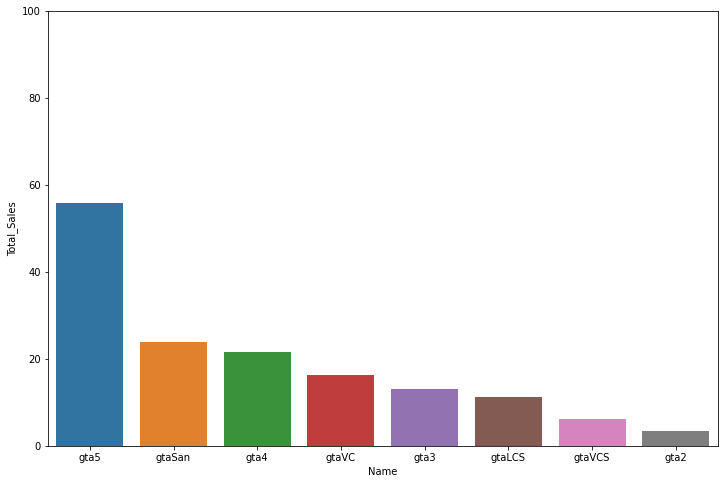

In [ ]:
plt.figure(figsize=(12, 8))
plt.ylim(0,100)
sns.barplot(data = gta_sales, x = 'Name', y = 'Total_Sales');

##Wii 시리즈의 그래프도 전체적인 판매량은 더 높지만 비슷한 양상을 보였다.

In [ ]:
#plt.figure(figsize=(12, 8))
#plt.ylim(0,100)
#sns.barplot(data = df_wii_top, x = 'Name', y = 'Total_Sales');

##5-5. GTA 시리즈가 플랫폼별로 나뉘어 집계되었는데, 그럼 플랫폼별 GTA 시리즈의 판매량은 어떤지 확인해보았다. 

In [ ]:
gta_platform = df_gta.groupby('Platform').sum()
gta_platform = gta_platform[['Total_Sales']]
gta_platform = gta_platform.reset_index()
gta_platform

,Platform,Total_Sales
0,DS,1.35
1,GBA,0.23
2,PC,2.10
3,PS,5.85
4,PS2,56.29
5,PS3,31.97
6,PS4,11.99
7,PSP,13.90
8,X360,27.53
9,XB,4.45


In [ ]:
#gta_platform = gta_platform.set_index('Platform', drop=True)

##가장 많은 판매량을 보인 플랫폼은 플레이스테이션 2 이며, 그 뒤를 플레이스테이션 3, 엑스박스360가 잇고 있다.
##GTA를 플레이하는 사람들은 대부분 소니의 플레이스테이션을 이용한다는 것을 알 수 있으며, 마이크로소프트의 엑스박스는 23% 정도에 그친다.
##의외로 PC 플랫폼에서는 판매량이 매우 낮음을 확인할 수 있다.

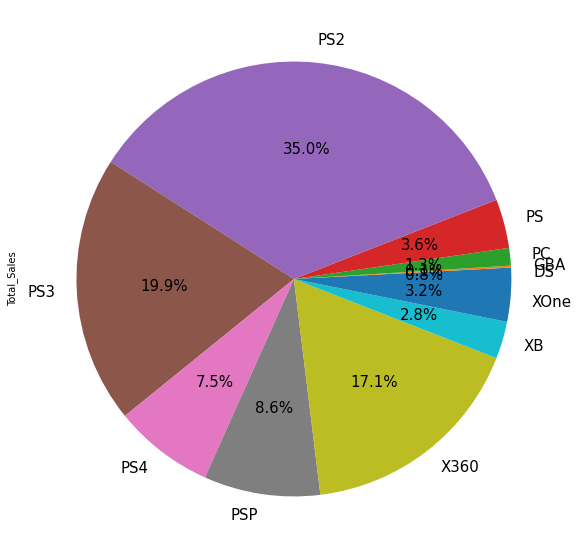

In [ ]:
gta_pie = gta_platform.groupby('Platform')['Total_Sales'].sum()
plt.figure(figsize=(20, 10))
gta_pie.plot.pie(autopct='%.1f%%', fontsize=15);

##5-6. Wii 시리즈의 플랫폼별 판매량도 확인해 보았다.
##비교적 다양한 플랫폼을 보여준 GTA 시리즈와는 다르게, Wii 시리즈는 거의 대부분 Wii 플랫폼에서만 플레이함을 확인할 수 있다.

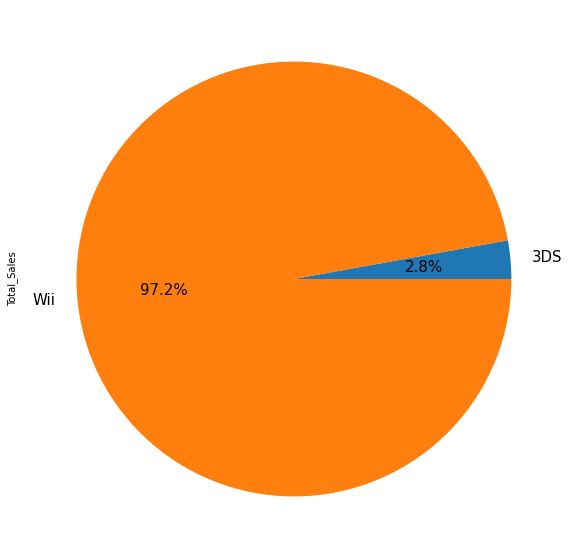

In [ ]:
wii_platform = df_wii_top.groupby('Platform').sum()
wii_platform = wii_platform[['Total_Sales']]
wii_platform = wii_platform.reset_index()
wii_platform

wii_pie = wii_platform.groupby('Platform')['Total_Sales'].sum()
plt.figure(figsize=(20, 10))
wii_pie.plot.pie(autopct='%.1f%%', fontsize=15);

------------

#6. 그러면 어떤 게임을 설계해야 높은 판매량을 얻을 수 있을까?

##6-1. 먼저 전체적인 시장의 규모를 파악한다.

In [ ]:
na_sales = df['NA_Sales'].sum()
eu_sales = df['EU_Sales'].sum()
jp_sales = df['JP_Sales'].sum()
ot_sales = df['Other_Sales'].sum()

In [ ]:
market = pd.DataFrame({'Market':['NA', 'EU', 'JP', 'Other'],
                       'Sales' :[ na_sales, eu_sales, jp_sales, ot_sales]})

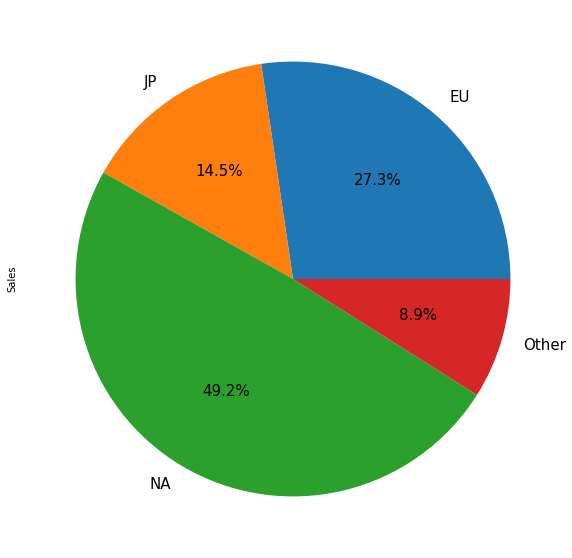

In [ ]:
market_pie = market.groupby('Market')['Sales'].sum()
plt.figure(figsize=(20, 10))
market_pie.plot.pie(autopct='%.1f%%', fontsize=15);

##세계 비디오게임 시장의 절반을 북미 시장이 차지하고 있음을 확인할 수 있다.

##따라서 게임을 출시한다면 북미 시장을 우선적으로 공략할 필요가 있어보인다.
## 실제로 많은 대형 게임들이 소비자의 구매 욕구를 높이기 위하여 미국의 블랙 프라이데이 시즌에 맞춰 출시되고 있다.

-------------

##6-2. 너무 옛날 게임은 현재 트렌트에 맞지 않을 수 있다. 또한 비디오게임의 특성상 기기의 발달에 따라 플레이 가능한 게임 또한 빠르게 변화한다.
##게임의 출시 시기 못지않게 중요한 것이 게임을 어느 플랫폼에서 플레이 가능한지이다.
##만약 출시하는 게임이 특정 플랫폼에서만 플레이가 가능하다면, 그 플랫폼을 사용하지 않는 사람들을 고객으로 만들 기회조차 얻지 못할 것이다.

------------

##2000년 이후 출시된 게임들의 플랫폼과 그 플랫폼의 총 판매량을 추출하였다.

In [ ]:
df_2000 = df[df['Year'] >= 2000]
platform_pie = df_2000.groupby('Platform')['Total_Sales'].sum()
platform_pie.to_frame()

,Total_Sales
Platform,
3DS,231.82
DC,7.41
DS,817.17
GB,29.00
GBA,304.76
GC,196.02
N64,37.21
PC,202.92
PS,140.66


In [ ]:
platform_pie = platform_pie.reset_index()

In [ ]:
#platform_pie

##총 20가지의 플랫폼이 있는데 대부분 닌텐도, 플레이스테이션, Xbox의 시리즈이다. 따라서 검색을 통해 플랫폼들을 몇 개의 카테고리로 분류하였다. 

In [ ]:
platform_pie['Category'] = ['Nintendo', 'Other', 'Nintendo', 'Nintendo', 'Nintendo','Nintendo', 
                            'Nintendo', 'PC', 'PlayStation', 'PlayStation', 'PlayStation','PlayStation',
                            'PlayStation','PlayStation','Other', 'Nintendo', 'Nintendo', 'Xbox', 'Xbox', 'Xbox']
#platform_pie

##6-3. 2000년 이후 출시된 게임들의 플랫폼별 판매량

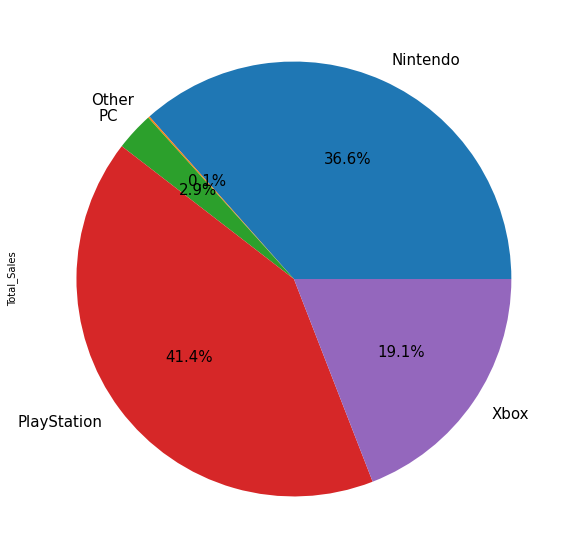

In [ ]:
#platform_pie
platform_pie_g = platform_pie.groupby('Category')['Total_Sales'].sum()
plt.figure(figsize=(20, 10))
platform_pie_g.plot.pie(autopct='%.1f%%', fontsize=15);

## 현재 비디오게임 시장 플랫폼의 현황은 닌텐도, 플레이스테이션, Xbox의 삼파전이라고 볼 수 있다.

## 의외로 PC가 비디오게임 시장에서 차지하는 비중은 매우 작다.

## 게임 판매량 비중은 플레이스테이션, 닌텐도, Xbox 순이다.

##실제로 현재 많은 게임들이 각 플랫폼에 맞는 버전을 따로 제작하고 있다.
## 예시로 'A' 라는 게임을 만들 때, 플레이스테이션판, Xbox판, PC판 등을 제공한다.

-----------------------

#정리

#1. 북미 시장을 우선적으로 고려한다.


#2. 일본과 일본을 제외한 지역은 선호 장르가 유의미하게 차이난다. 만약 타 지역과 일본에서 액션, 롤 플레잉 장르를 출시할 계획이라면, 전략을 다르게 짜야 할 필요성이 있다.

#3.현재의 게임 트렌드는 액션과 슈팅이다. 특히 액션 장르는 가장 판매량이 높으므로, 액션 장르의 게임을 설계하는것이 위험이 적을 것이다.

#4.시리즈 게임의 판매량이 높다. 만약 설계하고자 하는 게임의 전작이 존재하거나, 시리즈 게임일 경우, 다음 시리즈의 게임을 설계하는것이 판매량 측면에서 좋을 것이다.

#5. 게임을 설계할 때 한가지 플랫폼에서만 플레이 할 수 있는 게임이 아닌, 여러 플랫폼에서 플레이 가능하도록, 각 플랫폼에 맞는 버전을 제작하는것이 바람직할 것이다.

---------------------------

#분석의 한계

#1. 결측값 처리 과정에서 연도가 누락된 게임들의 정보가 삭제되었다.
#2. 가장 중요하다고 할 수 있는 최근의 데이터의 수가 매우 부족하다. 
# 따라서 데이터의 최신 업데이트가 필요하며, 새로운 데이터로 분석 시 결과가 달라질 가능성이 존재한다.

#3. 게임 판매 features가 판매 수량이라 매출액 등 정확한 금액에 대한 정보가 없다.
#따라서 값이 싼 게임이 많이 팔린 것과 비싼 게임이 비교적 적게 팔린 것 등 게임의 가격에 대한 분석과 그에 대한 설계가 불가능하다. 

#4. 현재 이 프로젝트를 진행하는 게임 회사에 대한 정보가 없다.
# 게임 회사 특성상 개발 경험이 굉장히 중요하기 때문에 각자 회사에 맞는 게임을 출시하는데 이에 대한 설계가 불가능하다.

#5. 게임 제작은 시장 조사가 중요한데 해당하는 데이터가 없다.